## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  49.895006   814.583614  0.451361  1.291844  1.545036
1  64.075514  1243.150452  0.315370  1.333934  1.283822
2  96.263986  1006.718515  0.743446  2.066651  1.532897
3  15.821958   294.115786  0.490858  3.803536  1.302505
4  98.718284  1357.836605  0.491398  8.728934  1.273291


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0485437	total: 66.2ms	remaining: 1m 6s
1:	learn: 1.0400344	total: 68.8ms	remaining: 34.3s
2:	learn: 1.0309804	total: 70ms	remaining: 23.3s
3:	learn: 1.0195608	total: 71.4ms	remaining: 17.8s
4:	learn: 1.0110491	total: 72.2ms	remaining: 14.4s
5:	learn: 1.0025293	total: 73.3ms	remaining: 12.2s
6:	learn: 0.9904310	total: 74.3ms	remaining: 10.5s
7:	learn: 0.9825309	total: 75.1ms	remaining: 9.32s
8:	learn: 0.9727697	total: 76.4ms	remaining: 8.41s
9:	learn: 0.9607113	total: 77.5ms	remaining: 7.67s
10:	learn: 0.9514716	total: 78.7ms	remaining: 7.08s
11:	learn: 0.9414699	total: 81.5ms	remaining: 6.71s
12:	learn: 0.9326430	total: 82.9ms	remaining: 6.29s
13:	learn: 0.9221482	total: 83.7ms	remaining: 5.89s
14:	learn: 0.9136084	total: 84.2ms	remaining: 5.53s
15:	learn: 0.9053013	total: 85ms	remaining: 5.23s
16:	learn: 0.8972797	total: 85.8ms	remaining: 4.96s
17:	learn: 0.8884373	total: 86.6ms	remaining: 4.72s
18:	learn: 0.8816570	total: 87.5ms	remaining: 4.

95:	learn: 0.4743286	total: 161ms	remaining: 1.52s
96:	learn: 0.4711770	total: 162ms	remaining: 1.5s
97:	learn: 0.4679794	total: 162ms	remaining: 1.49s
98:	learn: 0.4652405	total: 163ms	remaining: 1.48s
99:	learn: 0.4620617	total: 163ms	remaining: 1.47s
100:	learn: 0.4588297	total: 164ms	remaining: 1.46s
101:	learn: 0.4567027	total: 164ms	remaining: 1.44s
102:	learn: 0.4543660	total: 166ms	remaining: 1.44s
103:	learn: 0.4503249	total: 168ms	remaining: 1.45s
104:	learn: 0.4482938	total: 169ms	remaining: 1.44s
105:	learn: 0.4461206	total: 170ms	remaining: 1.43s
106:	learn: 0.4431197	total: 171ms	remaining: 1.42s
107:	learn: 0.4403321	total: 172ms	remaining: 1.42s
108:	learn: 0.4374229	total: 173ms	remaining: 1.41s
109:	learn: 0.4345252	total: 174ms	remaining: 1.4s
110:	learn: 0.4319565	total: 174ms	remaining: 1.4s
111:	learn: 0.4300697	total: 176ms	remaining: 1.39s
112:	learn: 0.4291099	total: 176ms	remaining: 1.38s
113:	learn: 0.4268531	total: 177ms	remaining: 1.38s
114:	learn: 0.423962

229:	learn: 0.2595648	total: 318ms	remaining: 1.06s
230:	learn: 0.2579031	total: 319ms	remaining: 1.06s
231:	learn: 0.2567257	total: 322ms	remaining: 1.06s
232:	learn: 0.2562663	total: 323ms	remaining: 1.06s
233:	learn: 0.2558751	total: 325ms	remaining: 1.06s
234:	learn: 0.2553373	total: 326ms	remaining: 1.06s
235:	learn: 0.2537274	total: 327ms	remaining: 1.06s
236:	learn: 0.2533802	total: 328ms	remaining: 1.05s
237:	learn: 0.2530074	total: 329ms	remaining: 1.05s
238:	learn: 0.2520372	total: 331ms	remaining: 1.05s
239:	learn: 0.2516715	total: 331ms	remaining: 1.05s
240:	learn: 0.2513070	total: 333ms	remaining: 1.05s
241:	learn: 0.2509696	total: 334ms	remaining: 1.05s
242:	learn: 0.2506080	total: 335ms	remaining: 1.04s
243:	learn: 0.2502725	total: 335ms	remaining: 1.04s
244:	learn: 0.2499230	total: 336ms	remaining: 1.04s
245:	learn: 0.2495491	total: 338ms	remaining: 1.03s
246:	learn: 0.2485453	total: 338ms	remaining: 1.03s
247:	learn: 0.2469881	total: 340ms	remaining: 1.03s
248:	learn: 

357:	learn: 0.1883179	total: 475ms	remaining: 852ms
358:	learn: 0.1881831	total: 475ms	remaining: 849ms
359:	learn: 0.1873014	total: 476ms	remaining: 846ms
360:	learn: 0.1863950	total: 478ms	remaining: 845ms
361:	learn: 0.1862622	total: 479ms	remaining: 844ms
362:	learn: 0.1853740	total: 479ms	remaining: 841ms
363:	learn: 0.1852464	total: 480ms	remaining: 839ms
364:	learn: 0.1848855	total: 481ms	remaining: 837ms
365:	learn: 0.1847583	total: 482ms	remaining: 834ms
366:	learn: 0.1837725	total: 482ms	remaining: 832ms
367:	learn: 0.1833361	total: 484ms	remaining: 830ms
368:	learn: 0.1824799	total: 484ms	remaining: 828ms
369:	learn: 0.1823456	total: 485ms	remaining: 826ms
370:	learn: 0.1822374	total: 486ms	remaining: 824ms
371:	learn: 0.1813995	total: 487ms	remaining: 822ms
372:	learn: 0.1812760	total: 488ms	remaining: 820ms
373:	learn: 0.1811561	total: 489ms	remaining: 818ms
374:	learn: 0.1803352	total: 490ms	remaining: 817ms
375:	learn: 0.1802173	total: 491ms	remaining: 815ms
376:	learn: 

476:	learn: 0.1416208	total: 603ms	remaining: 661ms
477:	learn: 0.1413204	total: 603ms	remaining: 659ms
478:	learn: 0.1407514	total: 605ms	remaining: 658ms
479:	learn: 0.1402308	total: 605ms	remaining: 656ms
480:	learn: 0.1396904	total: 606ms	remaining: 654ms
481:	learn: 0.1391340	total: 607ms	remaining: 653ms
482:	learn: 0.1385904	total: 608ms	remaining: 651ms
483:	learn: 0.1381637	total: 610ms	remaining: 650ms
484:	learn: 0.1378383	total: 610ms	remaining: 648ms
485:	learn: 0.1372295	total: 611ms	remaining: 646ms
486:	learn: 0.1367030	total: 612ms	remaining: 645ms
487:	learn: 0.1361119	total: 613ms	remaining: 643ms
488:	learn: 0.1358224	total: 614ms	remaining: 642ms
489:	learn: 0.1353096	total: 615ms	remaining: 640ms
490:	learn: 0.1347518	total: 616ms	remaining: 639ms
491:	learn: 0.1341496	total: 617ms	remaining: 637ms
492:	learn: 0.1336517	total: 618ms	remaining: 636ms
493:	learn: 0.1333722	total: 620ms	remaining: 635ms
494:	learn: 0.1330994	total: 622ms	remaining: 634ms
495:	learn: 

622:	learn: 0.0978915	total: 757ms	remaining: 458ms
623:	learn: 0.0974721	total: 758ms	remaining: 457ms
624:	learn: 0.0972375	total: 759ms	remaining: 455ms
625:	learn: 0.0970072	total: 764ms	remaining: 456ms
626:	learn: 0.0966139	total: 766ms	remaining: 456ms
627:	learn: 0.0964600	total: 767ms	remaining: 454ms
628:	learn: 0.0961123	total: 768ms	remaining: 453ms
629:	learn: 0.0958465	total: 769ms	remaining: 452ms
630:	learn: 0.0954525	total: 771ms	remaining: 451ms
631:	learn: 0.0951024	total: 773ms	remaining: 450ms
632:	learn: 0.0948827	total: 774ms	remaining: 449ms
633:	learn: 0.0945988	total: 775ms	remaining: 448ms
634:	learn: 0.0943760	total: 777ms	remaining: 446ms
635:	learn: 0.0941578	total: 778ms	remaining: 445ms
636:	learn: 0.0936978	total: 779ms	remaining: 444ms
637:	learn: 0.0934859	total: 780ms	remaining: 443ms
638:	learn: 0.0934435	total: 781ms	remaining: 441ms
639:	learn: 0.0932721	total: 782ms	remaining: 440ms
640:	learn: 0.0930666	total: 783ms	remaining: 439ms
641:	learn: 

704:	learn: 0.0796740	total: 886ms	remaining: 371ms
705:	learn: 0.0795133	total: 887ms	remaining: 369ms
706:	learn: 0.0790584	total: 888ms	remaining: 368ms
707:	learn: 0.0787382	total: 889ms	remaining: 367ms
708:	learn: 0.0784260	total: 890ms	remaining: 365ms
709:	learn: 0.0781216	total: 892ms	remaining: 364ms
710:	learn: 0.0778113	total: 893ms	remaining: 363ms
711:	learn: 0.0775152	total: 894ms	remaining: 362ms
712:	learn: 0.0774207	total: 895ms	remaining: 360ms
713:	learn: 0.0771265	total: 896ms	remaining: 359ms
714:	learn: 0.0767826	total: 897ms	remaining: 358ms
715:	learn: 0.0766944	total: 898ms	remaining: 356ms
716:	learn: 0.0763925	total: 899ms	remaining: 355ms
717:	learn: 0.0763073	total: 900ms	remaining: 354ms
718:	learn: 0.0762466	total: 901ms	remaining: 352ms
719:	learn: 0.0760932	total: 902ms	remaining: 351ms
720:	learn: 0.0758824	total: 904ms	remaining: 350ms
721:	learn: 0.0756013	total: 905ms	remaining: 348ms
722:	learn: 0.0753742	total: 905ms	remaining: 347ms
723:	learn: 

845:	learn: 0.0587441	total: 1.03s	remaining: 188ms
846:	learn: 0.0585867	total: 1.03s	remaining: 187ms
847:	learn: 0.0584322	total: 1.04s	remaining: 186ms
848:	learn: 0.0582292	total: 1.04s	remaining: 185ms
849:	learn: 0.0581614	total: 1.04s	remaining: 184ms
850:	learn: 0.0580100	total: 1.04s	remaining: 183ms
851:	learn: 0.0578111	total: 1.04s	remaining: 182ms
852:	learn: 0.0577738	total: 1.05s	remaining: 180ms
853:	learn: 0.0575803	total: 1.05s	remaining: 179ms
854:	learn: 0.0575434	total: 1.05s	remaining: 178ms
855:	learn: 0.0575070	total: 1.05s	remaining: 177ms
856:	learn: 0.0574643	total: 1.05s	remaining: 176ms
857:	learn: 0.0574284	total: 1.05s	remaining: 174ms
858:	learn: 0.0572798	total: 1.05s	remaining: 173ms
859:	learn: 0.0572135	total: 1.06s	remaining: 172ms
860:	learn: 0.0570255	total: 1.06s	remaining: 171ms
861:	learn: 0.0569835	total: 1.06s	remaining: 170ms
862:	learn: 0.0567681	total: 1.06s	remaining: 168ms
863:	learn: 0.0567327	total: 1.06s	remaining: 167ms
864:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.34843508765341386


ABC Pre-generator MAE 1.135887913382072


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

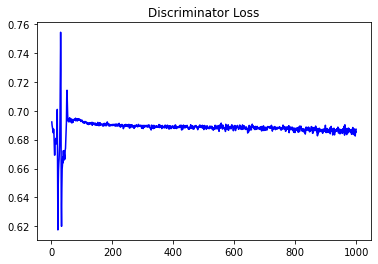

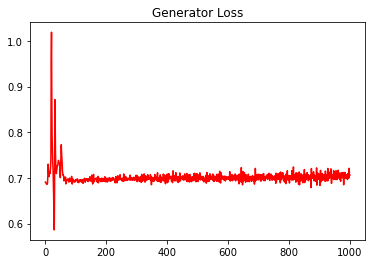

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.4085333814974874


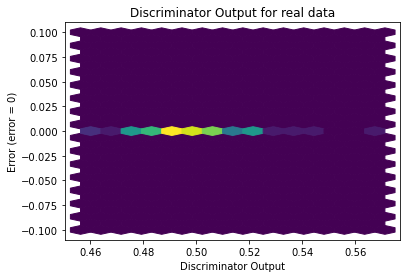

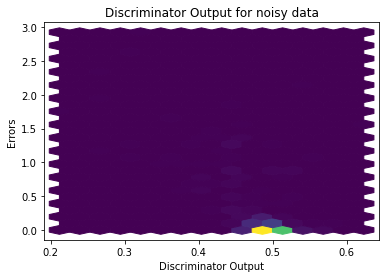

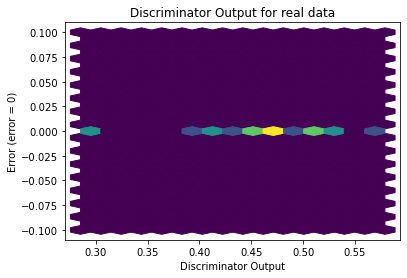

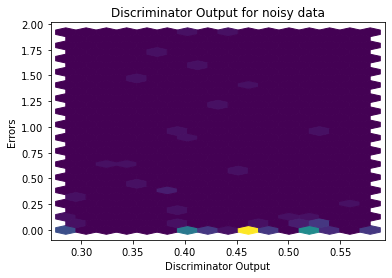

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

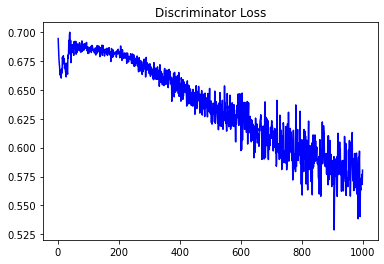

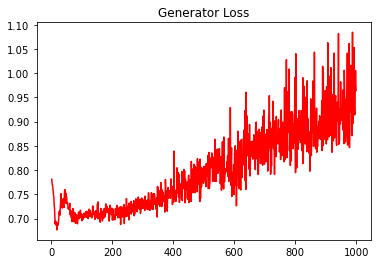

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.6811362102031708


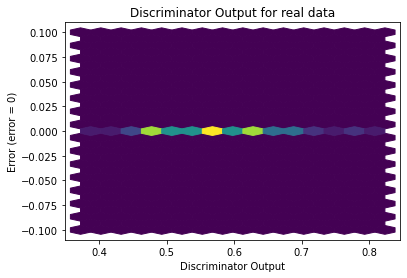

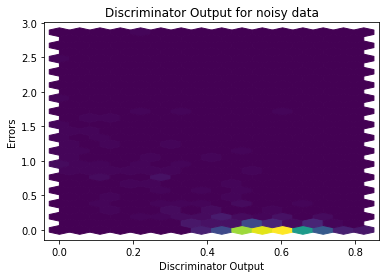

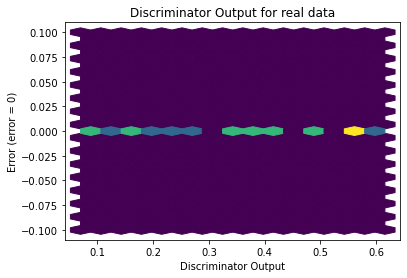

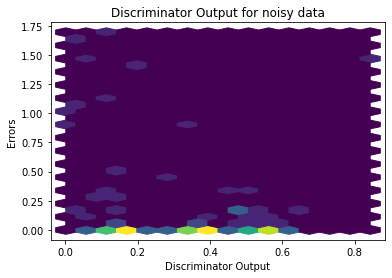

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


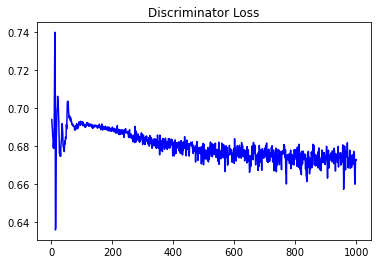

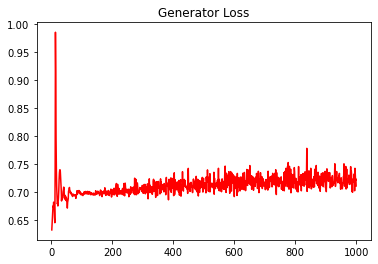

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.35044735981314445


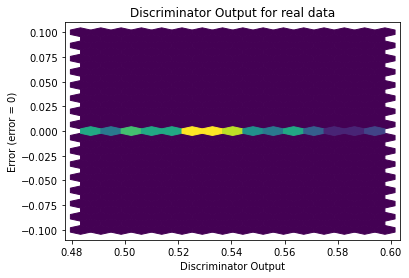

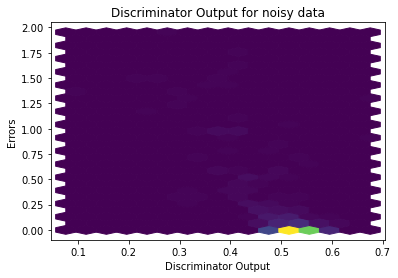

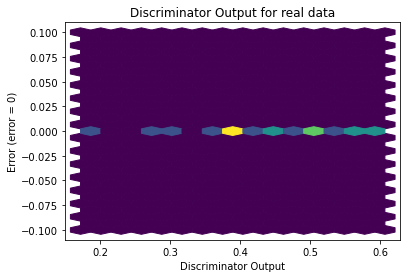

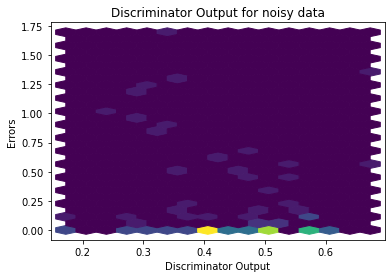

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


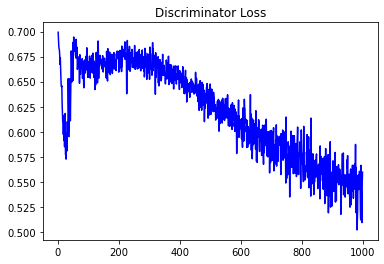

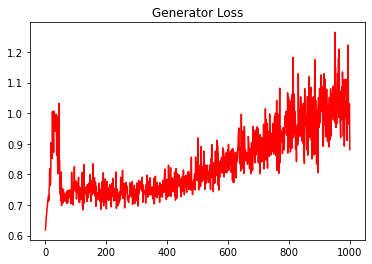

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5298146010078489


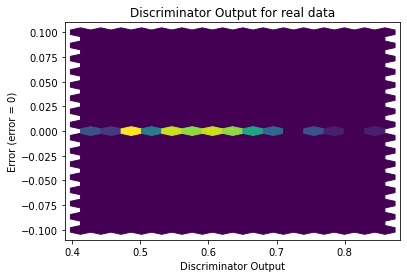

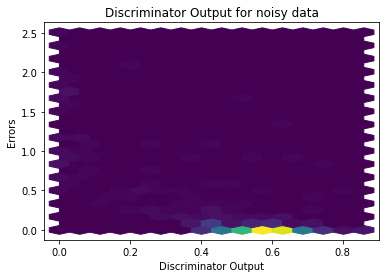

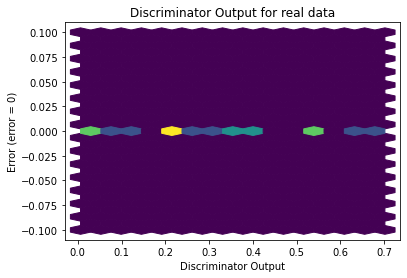

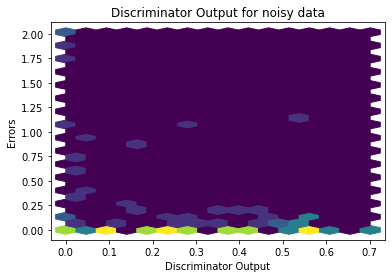

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7791]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5467]], requires_grad=True)
